In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lbg_forecast.nz_model as nz
from lbg_forecast.nz_model import NzModel

In [2]:
def gather_redshifts(nfiles, path):
    i = 0
    nz_data = []
    while(i < nfiles):
        nzs = np.load(path+"redshifts/emulated_redshifts_"+str(i)+".npy", allow_pickle=True)
        nsamples = nzs.shape[0]
        j = 0
        while(j < nsamples):
            nz_data.append(nzs[j, :])
            j+=1
        i+=1

    return np.asarray(nz_data)

In [3]:
def process_redshifts(nzs, bin_size, path):
     
    dz = bin_size
    minz = 0.0
    maxz = 7.0
    bins = np.arange(minz, maxz+dz, dz)

    z_grid = (bins[1:] + bins[0:-1])/2

    dropout = 0
    sample = 0
    nsamples = nzs.shape[0]
    newnzs = np.empty(3, dtype=object)
    while(dropout < 3):
        dropouts = []
        sample = 0
        while(sample < nsamples):
            nzhist = np.histogram(nzs[sample, dropout], density=True, bins=bins)
            dropouts.append(nzhist[0])
            sample+=1
        dropouts = np.asarray(dropouts)
        newnzs[dropout] = dropouts
        dropout+=1
    
    np.save(path+"redshifts/nzus.npy", newnzs[0])
    np.save(path+"redshifts/nzgs.npy", newnzs[1])
    np.save(path+"redshifts/nzrs.npy", newnzs[2])
    np.save(path+"redshifts/z_grid.npy", z_grid)

    return z_grid, newnzs
               


In [4]:
nzs = gather_redshifts(1, path="./")
total_nzs = len(nzs)
print("total nzs:", total_nzs)

total nzs: 128


In [5]:
z_grid, nz_pdfs = process_redshifts(nzs, 0.1, path="./")

In [6]:
nzmodel = NzModel(path="./")

/Users/fpetri/repos/LBGforecast/lbg_forecast/nz_model.py:282: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=0, fontsize= 24, frameon=False, ncols=3)


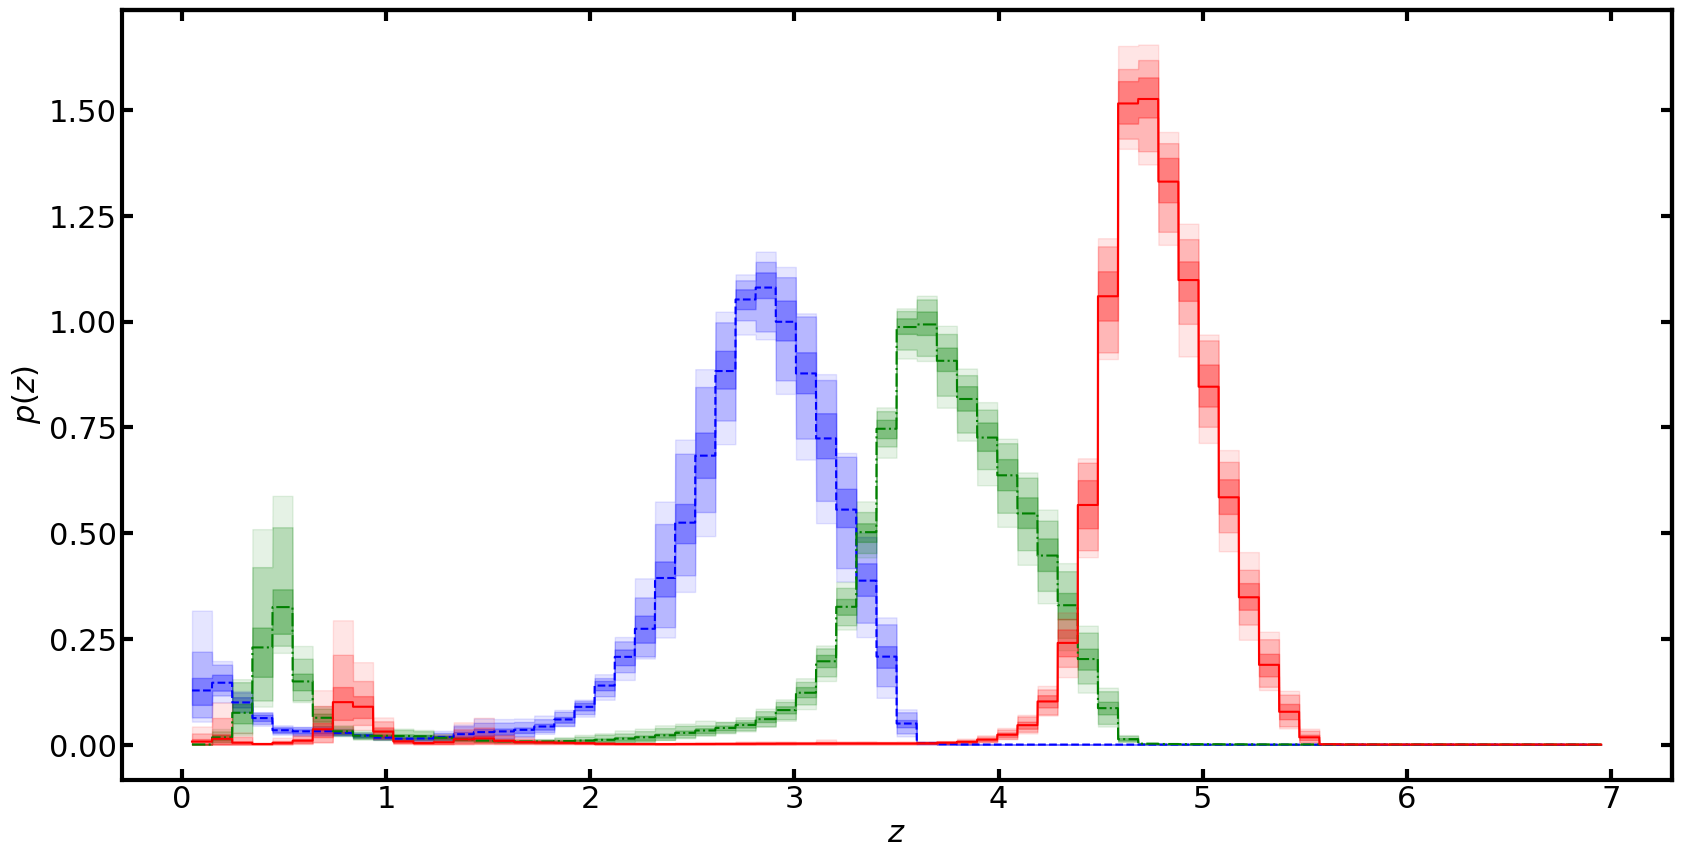

In [7]:
nzmodel.plot_all_data()

[1.98061242e-02 3.86134926e-03 1.02941081e-03 4.94719112e-04
 1.77369602e-04 1.51004897e-04 1.22974955e-04 8.76954508e-05
 7.84750846e-05 7.42808792e-05 6.95171533e-05 6.64713774e-05
 6.34846048e-05 5.99715888e-05 5.74279934e-05 5.04858644e-05
 4.87138732e-05 4.64445404e-05 4.44954484e-05 4.32187952e-05
 4.04014195e-05 3.86683623e-05 3.64725619e-05 3.53908565e-05
 3.45528684e-05 2.89566697e-05 2.86061855e-05 2.66642182e-05
 2.46742796e-05 2.36383133e-05 2.32156208e-05 2.11081522e-05
 2.00862588e-05 1.87143292e-05 1.63120450e-05 1.54290993e-05
 1.50564488e-05 1.35363101e-05 1.24753643e-05 1.06143970e-05
 8.61182671e-06 4.17055328e-06 7.23006693e-07 2.16925005e-37
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
[1.98061242e-02 3.86134926e-03 1.02941081e-03 4.94719112e-04
 1.77369602e-04 1.51004897e-04 1.22974955e-04 8.76954508e-05
 7.84750846e-05 7.42808792e-05 6.95171533e-05 6.64713774e-05
 6.34846048e-05 5.99715888e-05 5.74279934e-05 5.04858

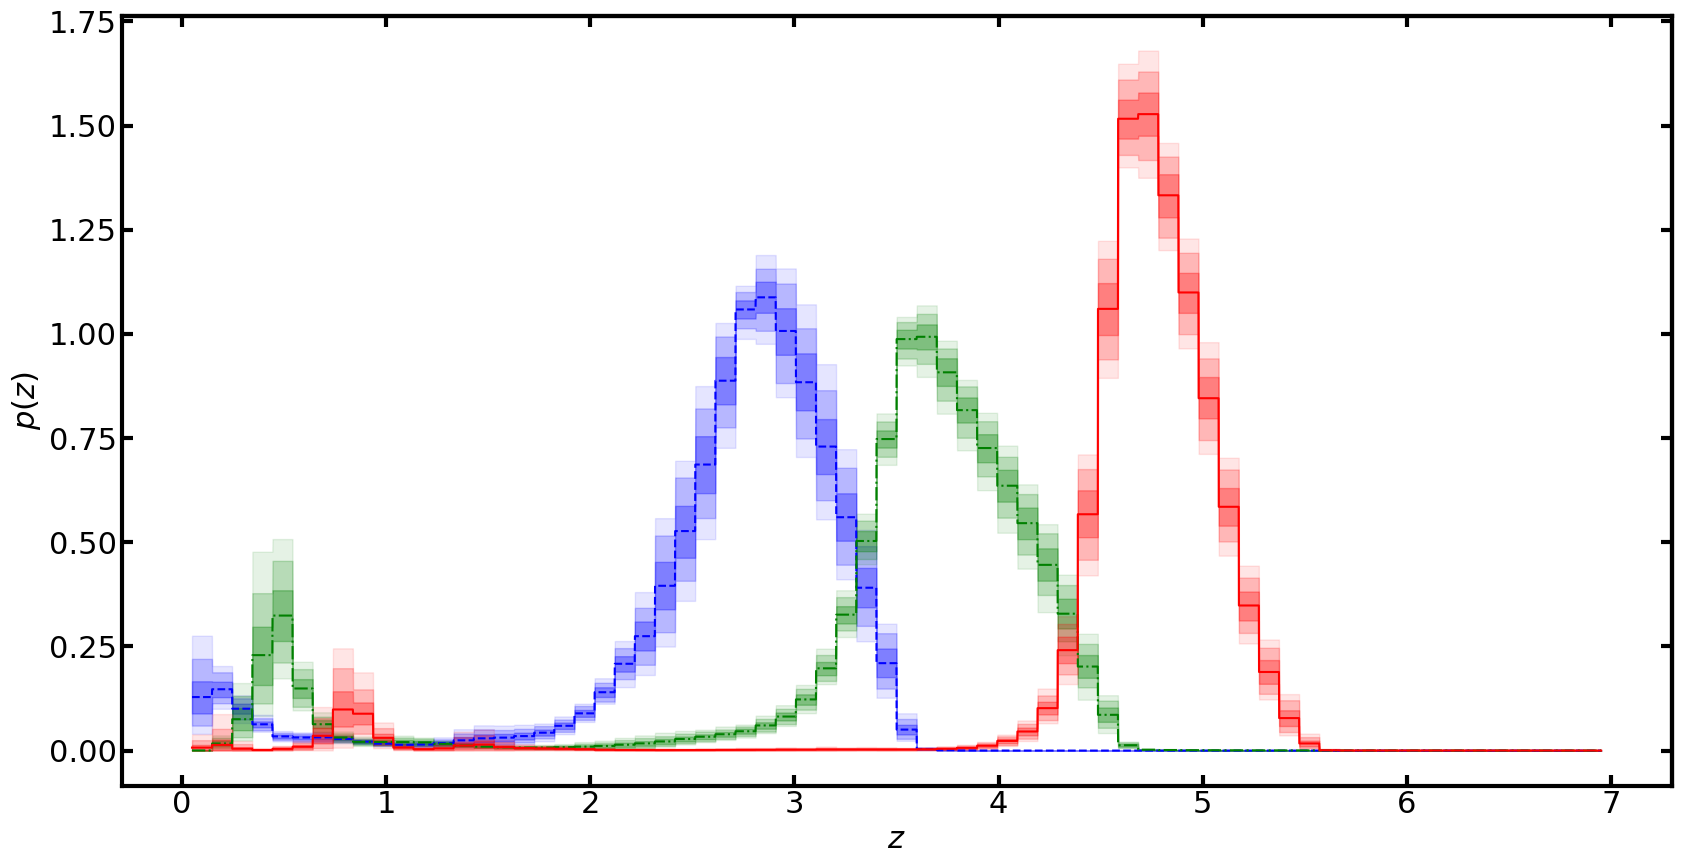

In [8]:
nzmodel.plot_all_pca(50, 1000)

In [9]:
nzmodel.save_npca_data(50, "./")